## Assignment

Import necessary library

In [59]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

Read the data

In [60]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

Drop unnecessary columns

In [61]:
# in pandas axis=0 represents rows (default) and axis=1 represents columns.
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.head(2)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603


Rename columns title

In [62]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

Add a 'Total' column

In [63]:
df_can['Total'] = df_can.sum(axis=1)

**Question 1:** Let's compare the number of immigrants from India and China from 1980 to 2013.


Step 1: Get the data set for China and India, and display dataframe.

In [64]:
### type your answer here
#untuk mempermudah proses filter data berdasarkan country
df_can.set_index('Country', inplace=True)

In [65]:
#menampilkan data dari china
print(df_can.loc['China'])

Continent                  Asia
Region             Eastern Asia
DevName      Developing regions
1980                       5123
1981                       6682
1982                       3308
1983                       1863
1984                       1527
1985                       1816
1986                       1960
1987                       2643
1988                       2758
1989                       4323
1990                       8076
1991                      14255
1992                      10846
1993                       9817
1994                      13128
1995                      14398
1996                      19415
1997                      20475
1998                      21049
1999                      30069
2000                      35529
2001                      36434
2002                      31961
2003                      36439
2004                      36619
2005                      42584
2006                      33518
2007                      27642
2008    

In [66]:
##menampilkan data dari china
print(df_can.loc['India'])

Continent                  Asia
Region            Southern Asia
DevName      Developing regions
1980                       8880
1981                       8670
1982                       8147
1983                       7338
1984                       5704
1985                       4211
1986                       7150
1987                      10189
1988                      11522
1989                      10343
1990                      12041
1991                      13734
1992                      13673
1993                      21496
1994                      18620
1995                      18489
1996                      23859
1997                      22268
1998                      17241
1999                      18974
2000                      28572
2001                      31223
2002                      31889
2003                      27155
2004                      28235
2005                      36210
2006                      33848
2007                      28742
2008    

In [67]:
### type your answer here
#untuk menghindari ambiguitas nama kolom dengan bilangan bulat dan index
df_can.columns = list(map(str, df_can.columns))
years = list(map(str, range(1980, 2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [68]:
#Karena ingin menampilkan data berdasarkan negara. maka untuk menampilkan berdasarkan negara (kondidi tertentu) dilakukan 
#perubahan dr continent menjadi boolean
condition = df_can['Continent'] == 'Asia'
print(condition)

Country
Afghanistan                                              True
Albania                                                 False
Algeria                                                 False
American Samoa                                          False
Andorra                                                 False
Angola                                                  False
Antigua and Barbuda                                     False
Argentina                                               False
Armenia                                                  True
Australia                                               False
Austria                                                 False
Azerbaijan                                               True
Bahamas                                                 False
Bahrain                                                  True
Bangladesh                                               True
Barbados                                                False


In [70]:
#print data yang diminta
df_can.loc[['China','India'], years] 

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087


Step 2: Plot graph. We will explicitly specify line plot by passing in `kind` parameter to `plot()`.

In [72]:
### type your answer here
#extract Data
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)
df = df_can.loc[['China','India'], years] 
df = df[years].transpose()

df.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


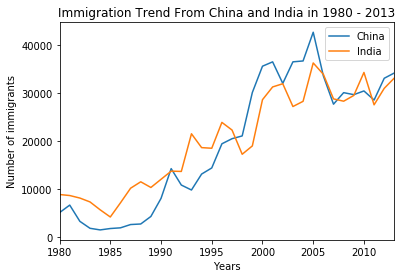

In [76]:
#Rubah index jadi integer untuk plot data 
df.index = df.index.map(int)

#Line Plot
china = df_can.loc['China',years]
india = df_can.loc['India',years]

china.plot(kind='line')
india.plot(kind='line')

plt.title('Immigration Trend From China and India in 1980 - 2013')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')
plt.legend(['China','India'])

plt.show() 

**Question 2:** Compare the trend of top 5 countries that contributed the most to immigration to Canada.

In [77]:
### type your answer here
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)

#top 5 countries
df_top5 = df_can.head()

#transpose dataframe
df_top5 = df_top5[years].transpose() 
df_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


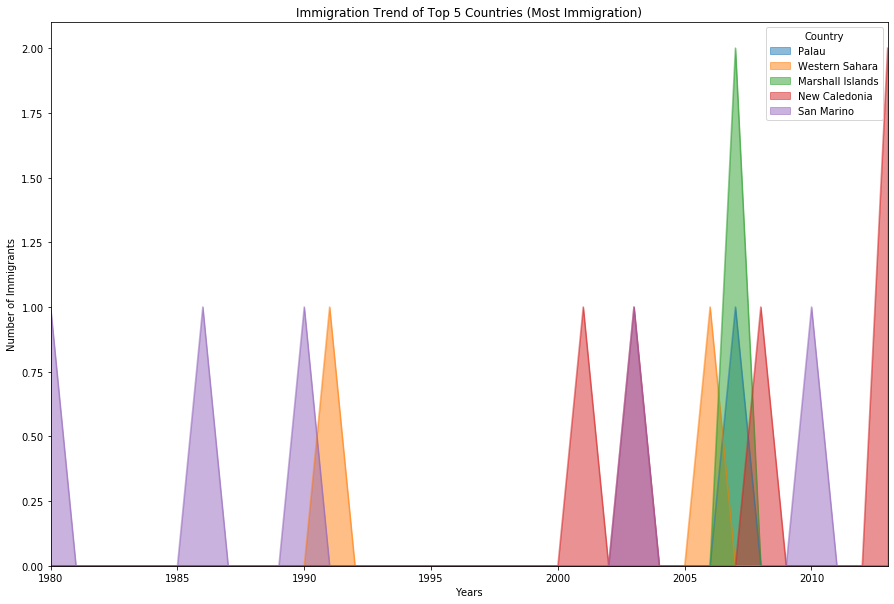

In [90]:
### type your answer here

#rubah index value dari df top 5 ke type integer untuk plot data
df_top5.index = df_top5.index.map(int) 
df_top5.plot(kind='area', stacked=False, figsize=(15, 10))
 
plt.title('Immigration Trend of Top 5 Countries (Most Immigration)')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()

**Question 3**: Create an unstacked area plot of the 5 countries that contributed the least to immigration to Canada **from** 1980 to 2013. Use a transparency value of 0.55.

In [91]:
### type your answer here
df_can.sort_values(['Total'], ascending=True, axis=0, inplace=True)

#top 5 least countries
df_top5 = df_can.head()

#transpose dataframe
df_top5 = df_top5[years].transpose() 
df_top5.head()

Country,Palau,Western Sahara,Marshall Islands,New Caledonia,San Marino
1980,0,0,0,0,1
1981,0,0,0,0,0
1982,0,0,0,0,0
1983,0,0,0,0,0
1984,0,0,0,0,0


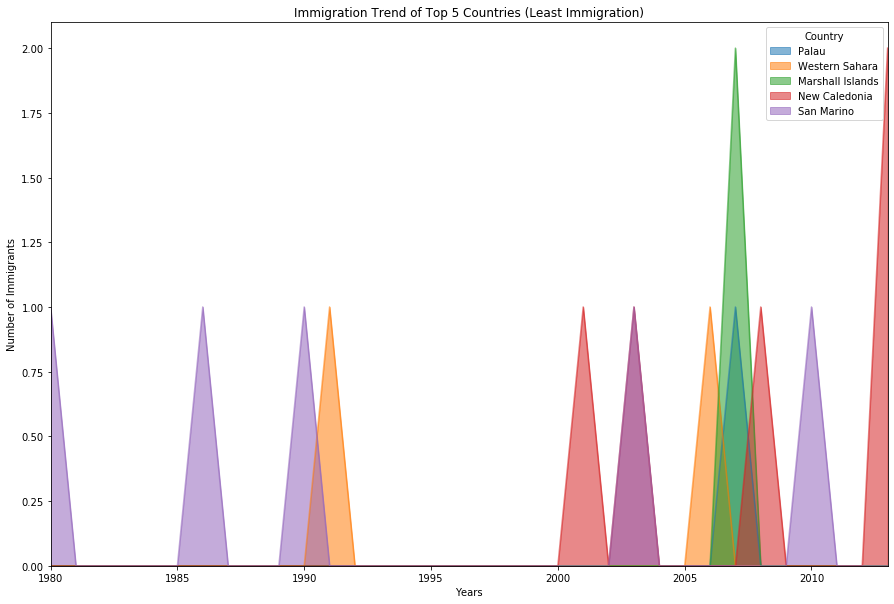

In [92]:
### type your answer 
# alpha = 0.55
df_top5.index = df_top5.index.map(int)
df_top5.plot(kind='area', alpha=0.55, stacked=False, figsize=(15, 10))

plt.title('Immigration Trend of Top 5 Countries (Least Immigration)')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

**Question 4**: Display the immigration distribution for Greece, Albania, and Bulgaria for years 1980 - 2013? Use an overlapping plot with 15 bins and a transparency value of 0.35.

In [98]:
### type your answer here
df_can.loc[['Greece', 'Albania', 'Bulgaria'], years]

# transpose dataframe
df_canT = df_can.loc[['Greece', 'Albania', 'Bulgaria'], years].transpose()
df_canT.head()

Country,Greece,Albania,Bulgaria
1980,1065,1,24
1981,953,0,20
1982,897,0,12
1983,633,0,33
1984,580,0,11


In [99]:
count, bin_edges = np.histogram(df_canT, 15)

print(count) 
print(bin_edges) 

[37  9  4  6 13  9  5  5  3  3  2  3  1  1  1]
[   0.   134.8  269.6  404.4  539.2  674.   808.8  943.6 1078.4 1213.2
 1348.  1482.8 1617.6 1752.4 1887.2 2022. ]


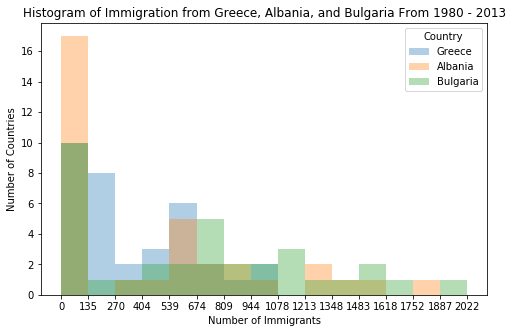

In [111]:
df_canT.plot(kind='hist', figsize=(8, 5), bins=15, alpha=0.35, xticks=bin_edges)

plt.title('Histogram of Immigration from Greece, Albania, and Bulgaria From 1980 - 2013') 
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label

plt.show()

**Question 5:** Create a *horizontal* bar plot showing the *total* number of immigrants to Canada from the top 15 countries, for the period 1980 - 2013. Label each country with the total immigrant count.

Step 1: Get the data pertaining to the top 15 countries.

In [116]:
### type your answer here
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)

#top 5 least countries
df_top15 = df_can.head(15)

#transpose dataframe
df_top15 = df_top15[years].transpose() 
df_top15.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan,United States of America,Iran (Islamic Republic of),Sri Lanka,Republic of Korea,Poland,Lebanon,France,Jamaica,Viet Nam,Romania
1980,8880,5123,22045,6051,978,9378,1172,185,1011,863,1409,1729,3198,1191,375
1981,8670,6682,24796,5921,972,10030,1429,371,1456,2930,1119,2027,2634,1829,438
1982,8147,3308,20620,5249,1201,9074,1822,290,1572,5881,1159,2219,2661,2162,583
1983,7338,1863,10015,4562,900,7100,1592,197,1081,4546,789,1490,2455,3404,543
1984,5704,1527,10170,3801,668,6661,1977,1086,847,3588,1253,1169,2508,7583,524


Step 2: Plot data:
   1. Use `kind='barh'` to generate a bar chart with horizontal bars.
   2. Make sure to choose a good size for the plot and to label your axes and to give the plot a title.
   3. Loop through the countries and annotate the immigrant population using the anotate function of the scripting interface.

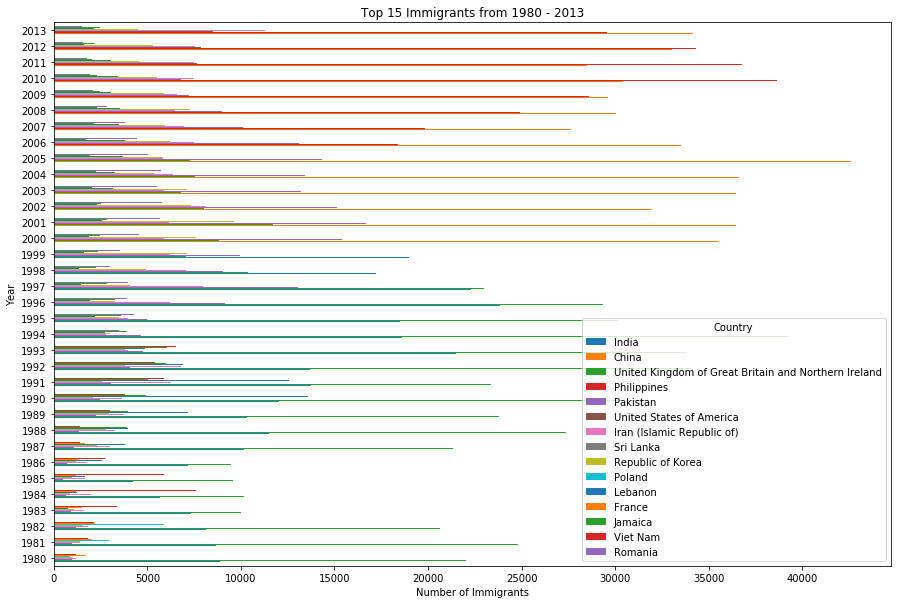

In [118]:
### type your answer here
df_top15.plot(kind='barh', figsize=(15, 10))

plt.xlabel('Number of Immigrants') 
plt.ylabel('Year') 
plt.title('Top 15 Immigrants from 1980 - 2013')

plt.show()

# Thank you for completing this lab!

<hr>

Copyright &copy; 2019 [Cognitive Class](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).